<a href="https://colab.research.google.com/github/fedunya/Jupyter/blob/main/Jupyter_seminar4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задача 1
Постройте график.  
Назовите график.  
Сделайте именование оси x и оси y.  
Сделайте выводы.

###1.1 Считать данные с помощью pandas.

In [2]:
df = pd.read_csv('./kc_house_data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


###1.2 Изучите стоимости недвижимости.

Text(0, 0.5, 'Количество объектов недвижимости')

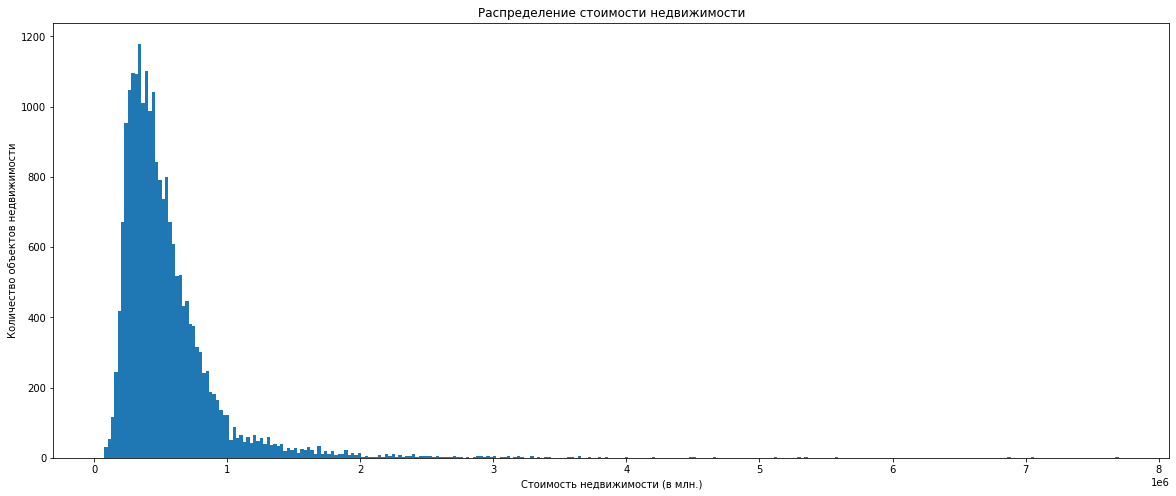

In [3]:
plt.figure(figsize=(20, 8))
plt.hist(df['price'], bins=300)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость недвижимости (в млн.)')
plt.ylabel('Количество объектов недвижимости')

Стоимость большинства объектов недвижимости до 1 млн

###1.3 Изучите распределение квадратуры жилой.

Text(0, 0.5, 'Количество объектов недвижимости')

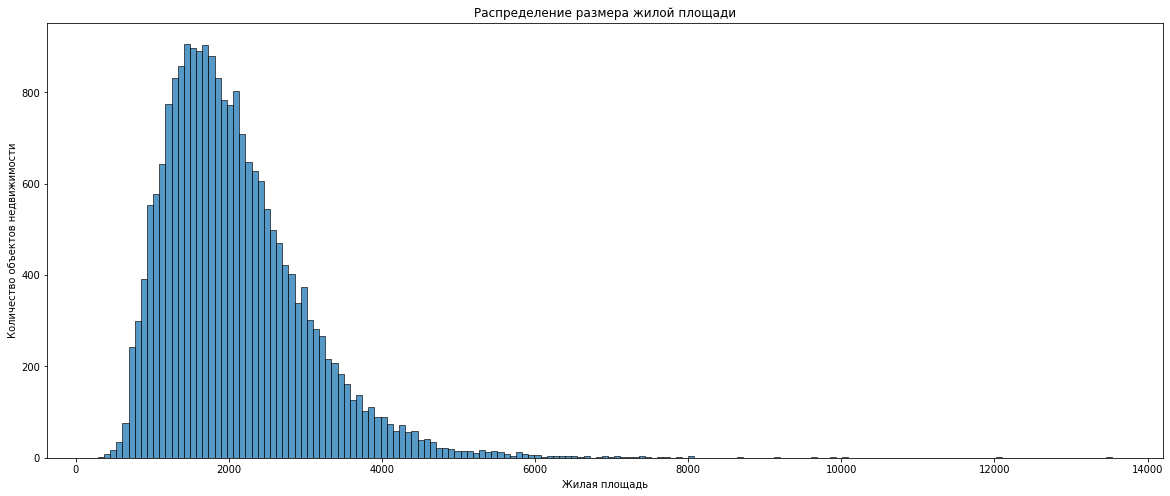

In [4]:
plt.figure(figsize=(20, 8))
sns.histplot(df['sqft_living'])
plt.title('Распределение размера жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество объектов недвижимости')

Жилая площадь большинства объектов недвижимости до 5000 квадратных футов

###1.4 Изучите распределение года постройки.

Text(0, 0.5, 'Количество объектов недвижимости')

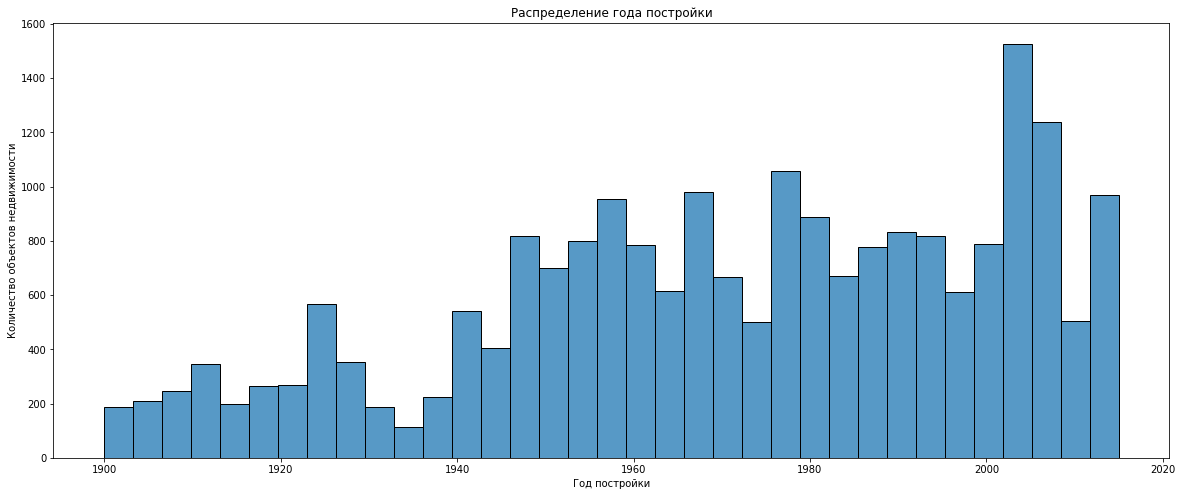

In [5]:
plt.figure(figsize=(20, 8))
sns.histplot(df['yr_built'])
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество объектов недвижимости')

Большая часть домов построена после 1940 года

##Задача 2

###2.1 Изучите распределение домов от наличия вида на набережную. Постройте график. Сделайте выводы.

In [6]:
data = df['waterfront'].value_counts().reset_index()
data['index'].replace({0: 'нет', 1: 'есть'}, inplace=True)
data.head()

,index,waterfront
0,нет,21450
1,есть,163


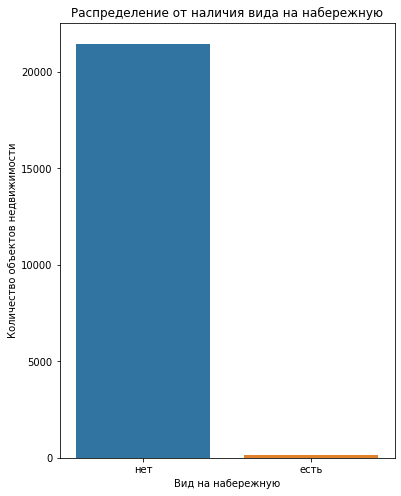

In [7]:
plt.figure(figsize=(6, 8))
sns.barplot(x=data['index'], y=data['waterfront'])
plt.title('Распределение от наличия вида на набережную')
plt.xlabel('Вид на набережную')
plt.ylabel('Количество объектов недвижимости');

###2.2 Изучите распределение этажей домов.

In [8]:
data1 = df['floors'].value_counts().reset_index().sort_values('index')
data1.head(6)

,index,floors
0,1.0,10680
2,1.5,1910
1,2.0,8241
4,2.5,161
3,3.0,613
5,3.5,8


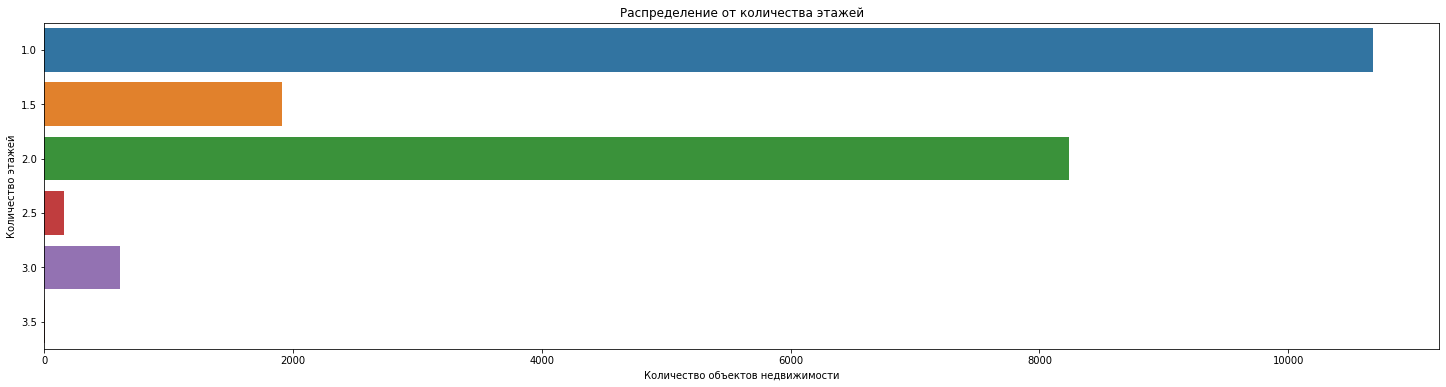

In [9]:
plt.figure(figsize=(25, 6))
sns.barplot(x=data1['floors'], y=data1['index'], orient='h')
plt.title('Распределение от количества этажей')
plt.xlabel('Количество объектов недвижимости')
plt.ylabel('Количество этажей');

###2.3 Изучите распределение состояния домов.

In [10]:
data2 = df['condition'].value_counts().reset_index().sort_values('index')
data2.head()

,index,condition
4,1,30
3,2,172
0,3,14031
1,4,5679
2,5,1701


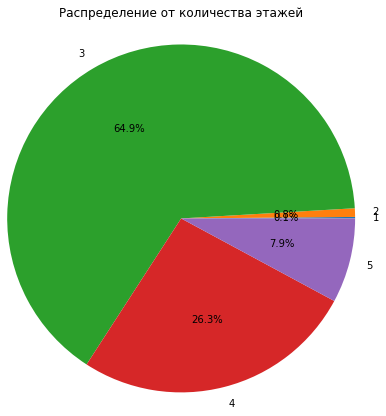

In [11]:
plt.pie(data2['condition'], autopct='%1.1f%%', labels=data2['index'], radius=2)
plt.title('Распределение от количества этажей', y=1.4);

##Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

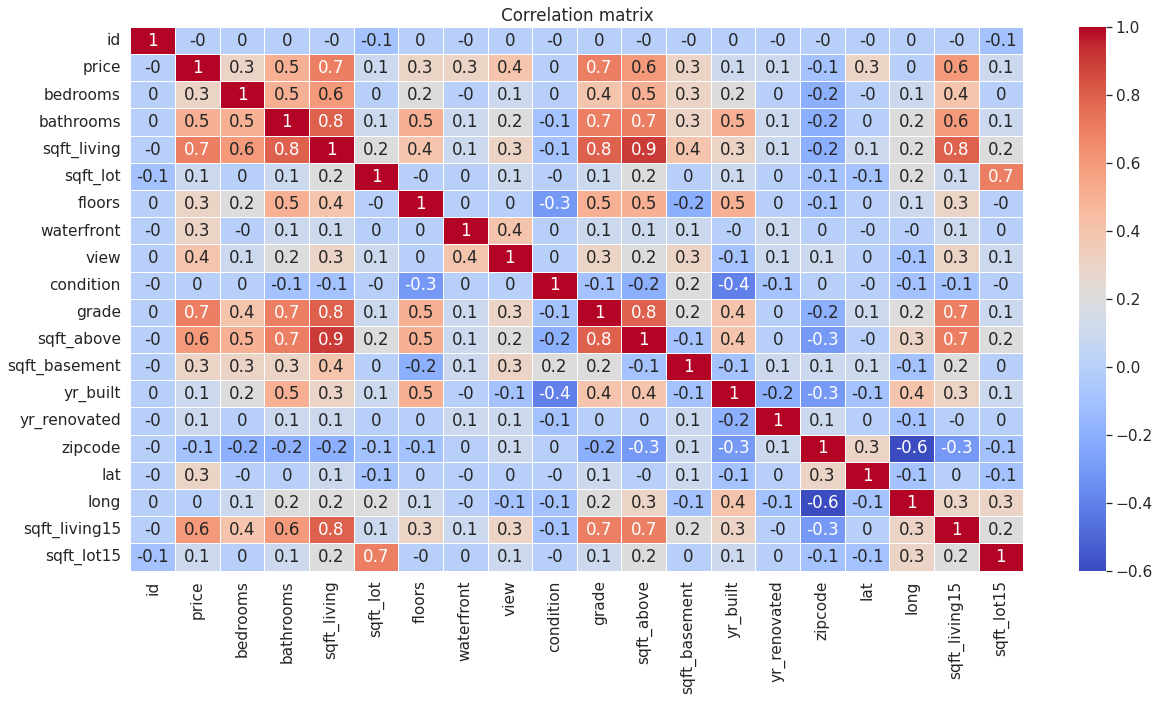

In [12]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix');

In [13]:
price_bedrooms = df.groupby('bedrooms').agg({'price': 'mean'}).reset_index().sort_values('price')

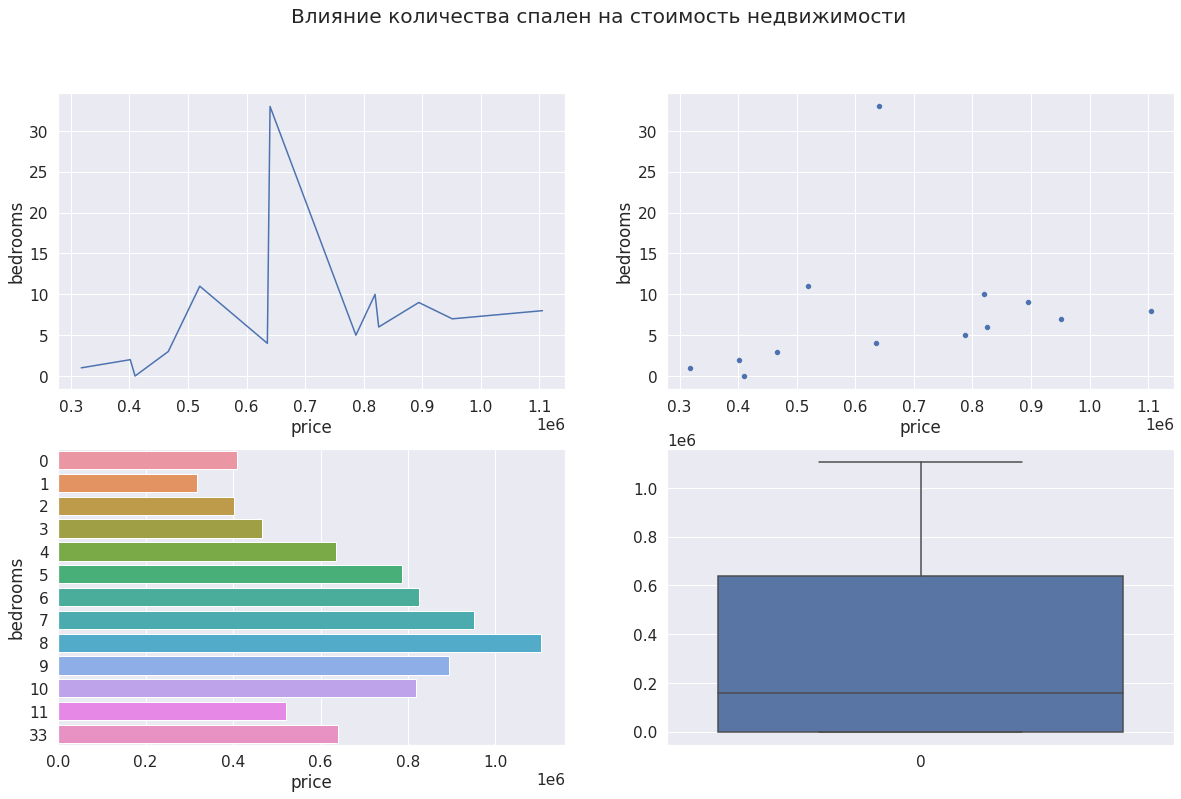

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
plt.suptitle('Влияние количества спален на стоимость недвижимости')
sns.lineplot(x=price_bedrooms['price'], y=price_bedrooms['bedrooms'], ax=axes[0, 0])
sns.scatterplot(x=price_bedrooms['price'], y=price_bedrooms['bedrooms'], ax=axes[0, 1])
sns.barplot(x=price_bedrooms['price'], y=price_bedrooms['bedrooms'], orient='h', ax=axes[1, 0])
sns.boxplot(data=[price_bedrooms], ax=axes[1, 1]);

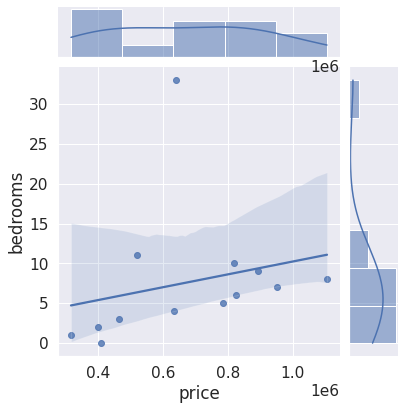

In [ ]:
sns.jointplot(x=price_bedrooms['price'], y=price_bedrooms['bedrooms'], kind='reg');

Рассмотрим влияние количества спален (комнат) на стоимость недвижимости. Недвижимость с нулевым количеством спален можно отнести к отдельной категории жилья и не учитывать, как и жилье с 33 спальнями - исключительный случай, т. е. выброс. Тогда мы видим, что с увеличением числа спален вплоть до 8 стоимость растет, а затем уменьшается. Это может быть связано с тем, что жилье с количеством спален больше 8 не пользуется спросом.

In [19]:
price_condition = df.groupby('condition').agg({'price': 'mean'}).reset_index().sort_values('price')

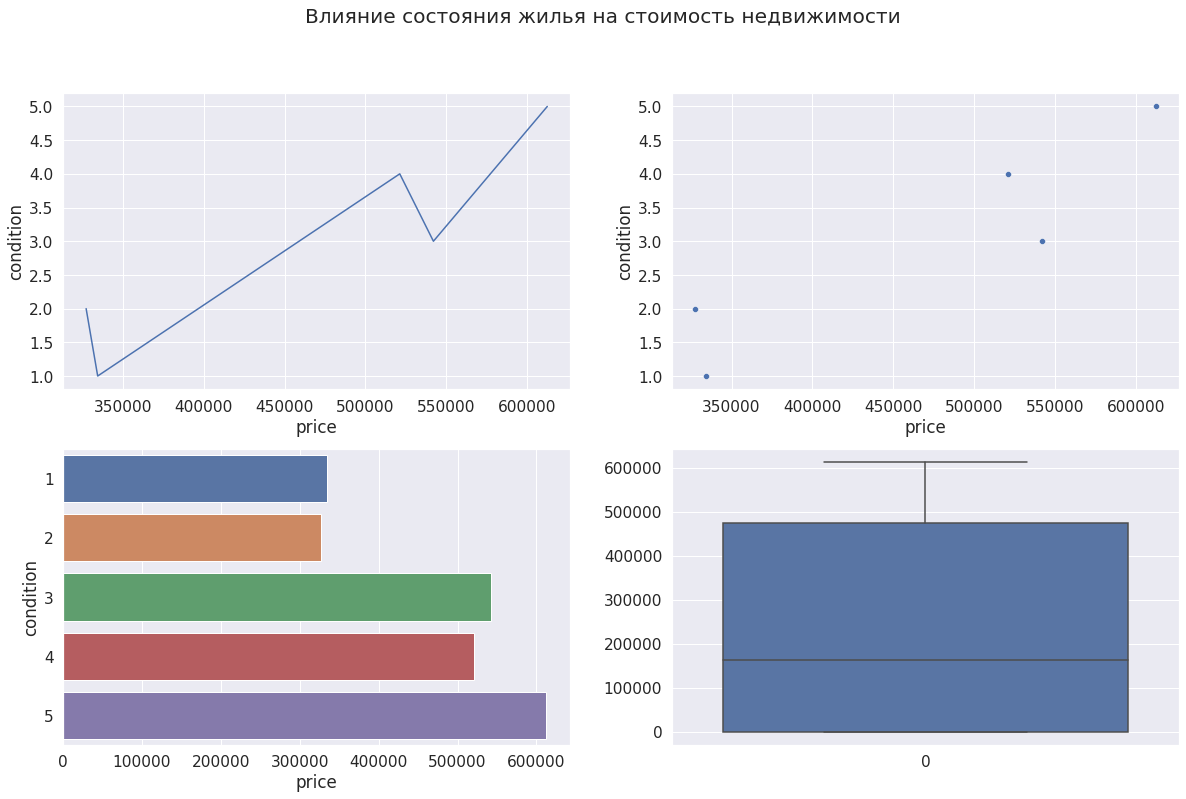

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
plt.suptitle('Влияние состояния жилья на стоимость недвижимости')
sns.lineplot(x=price_condition['price'], y=price_condition['condition'], ax=axes[0, 0])
sns.scatterplot(x=price_condition['price'], y=price_condition['condition'], ax=axes[0, 1])
sns.barplot(x=price_condition['price'], y=price_condition['condition'], orient='h', ax=axes[1, 0])
sns.boxplot(data=[price_condition], ax=axes[1, 1]);

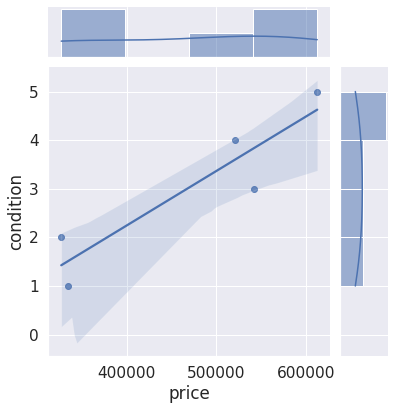

In [18]:
sns.jointplot(x=price_condition['price'], y=price_condition['condition'], kind='reg');

Рассмотрим влияние состояния жилья на стоимость недвижимости. Здесь мы видим, что чем лучше состояние, тем выше стоимость. Прослеживаются три группы, в которых цена практически не отличается: 1-2 - плохое состояние, 3-4 - среднее, 5 - хорошее.

In [23]:
price_grade = df.groupby('grade').agg({'price': 'mean'}).reset_index().sort_values('price')

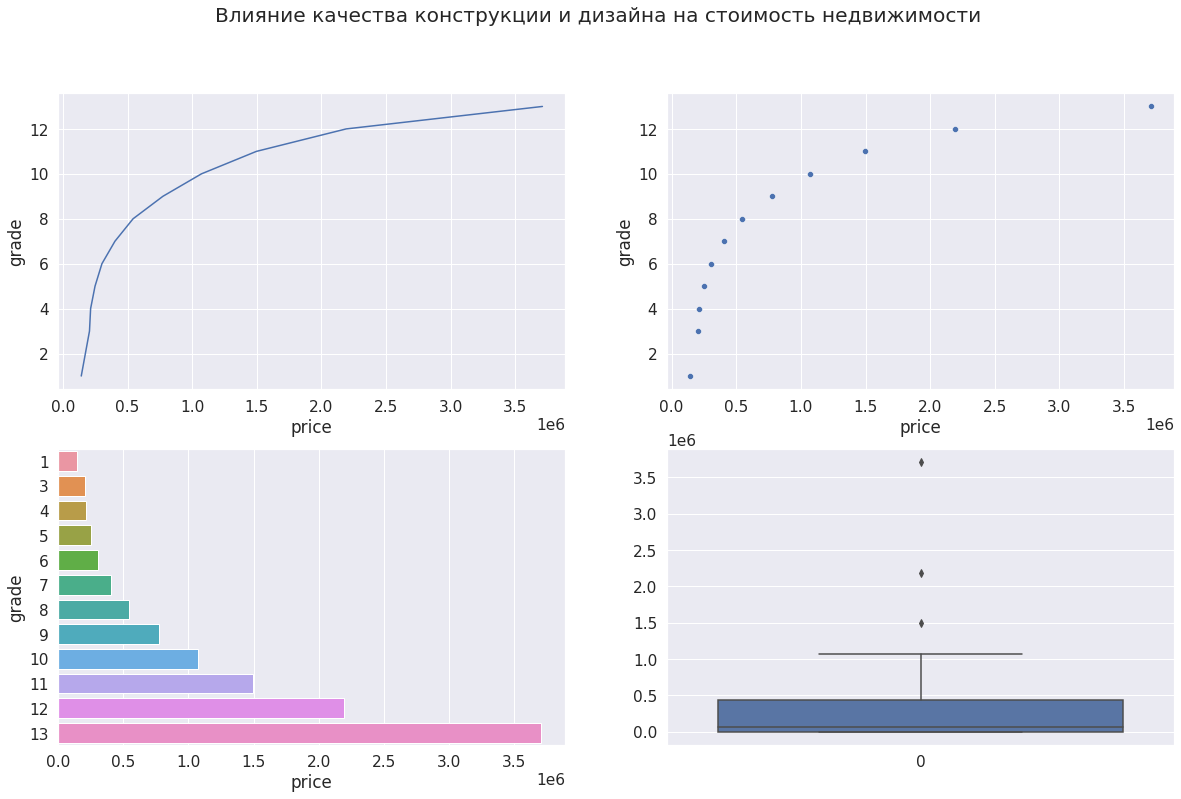

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
plt.suptitle('Влияние качества конструкции и дизайна на стоимость недвижимости')
sns.lineplot(x=price_grade['price'], y=price_grade['grade'], ax=axes[0, 0])
sns.scatterplot(x=price_grade['price'], y=price_grade['grade'], ax=axes[0, 1])
sns.barplot(x=price_grade['price'], y=price_grade['grade'], orient='h', ax=axes[1, 0])
sns.boxplot(data=[price_grade], ax=axes[1, 1]);

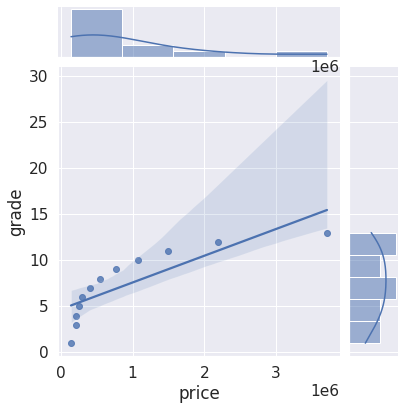

In [22]:
sns.jointplot(x=price_grade['price'], y=price_grade['grade'], kind='reg');

Рассмотрим влияние качества конструкции и дизайна на стоимость недвижимости. Здесь ярко выражена нелинейная зависимость. С ростом качества цена резко возрастает.

In [27]:
price_floors = df.groupby('floors').agg({'price': 'mean'}).reset_index().sort_values('price')

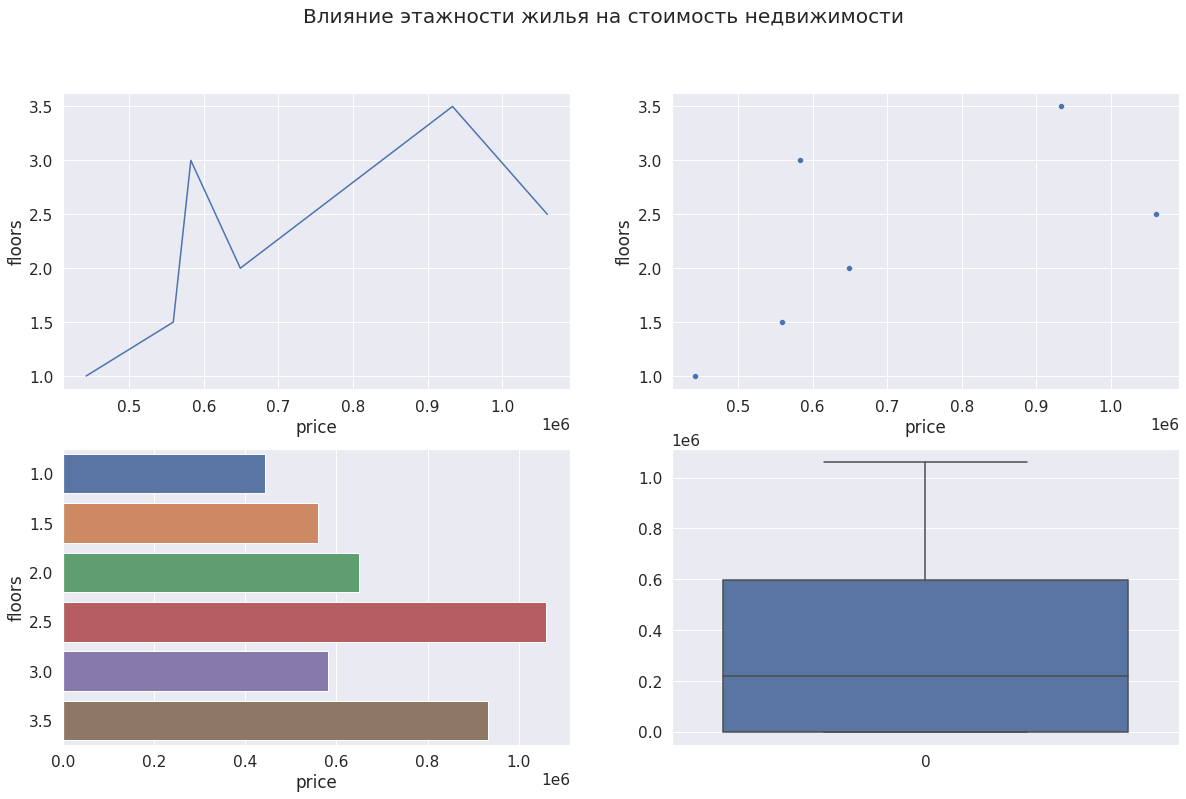

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
plt.suptitle('Влияние этажности жилья на стоимость недвижимости')
sns.lineplot(x=price_floors['price'], y=price_floors['floors'], ax=axes[0, 0])
sns.scatterplot(x=price_floors['price'], y=price_floors['floors'], ax=axes[0, 1])
sns.barplot(x=price_floors['price'], y=price_floors['floors'], orient='h', ax=axes[1, 0])
sns.boxplot(data=[price_floors], ax=axes[1, 1]);

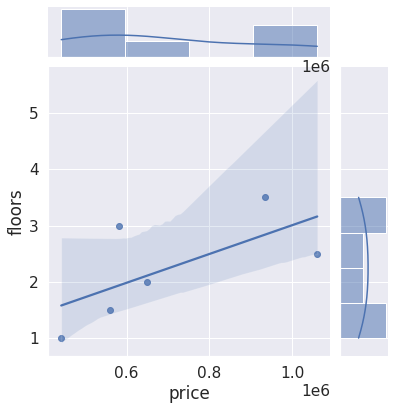

In [26]:
sns.jointplot(x=price_floors['price'], y=price_floors['floors'], kind='reg');

Рассмотрим влияние этажности дома на стоимость недвижимости. Явной зависимости здесь не просматривается. Можно предположить, что 2-х и 3,5- этажные дома пользуются спросом, поскольку цена на них явно выше.

In [29]:
price_view = df.groupby('view').agg({'price': 'mean'}).reset_index().sort_values('price')

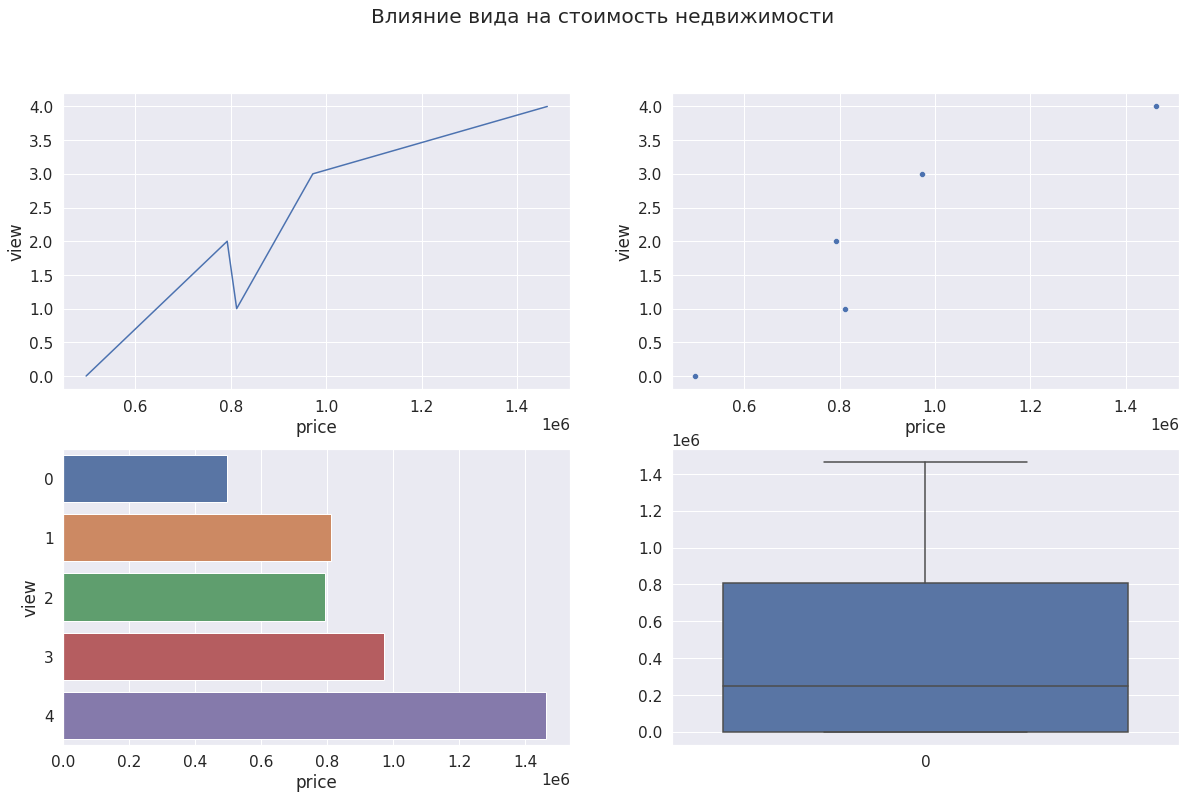

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
plt.suptitle('Влияние вида на стоимость недвижимости')
sns.lineplot(x=price_view['price'], y=price_view['view'], ax=axes[0, 0])
sns.scatterplot(x=price_view['price'], y=price_view['view'], ax=axes[0, 1])
sns.barplot(x=price_view['price'], y=price_view['view'], orient='h', ax=axes[1, 0])
sns.boxplot(data=[price_view], ax=axes[1, 1]);

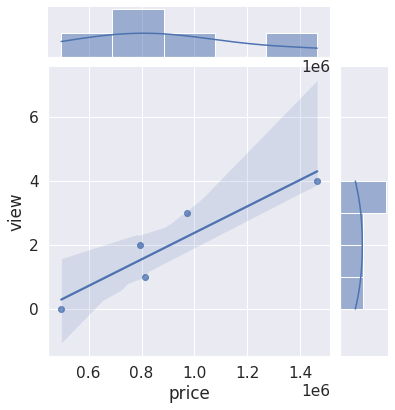

In [34]:
sns.jointplot(x=price_view['price'], y=price_view['view'], kind='reg');

Рассмотрим влияние вида на стоимость недвижимости. Чем лучше вид, тем выше цена. (А если бы мы проживали в США да еще в округе King штата Вашингтон, то было бы более понятно, что подразумевается под признаком view - то ли вид из окон, то ли внешний вид здания, то ли ... Можно было бы попытаться описать влияние этого признака на цену более внятно).

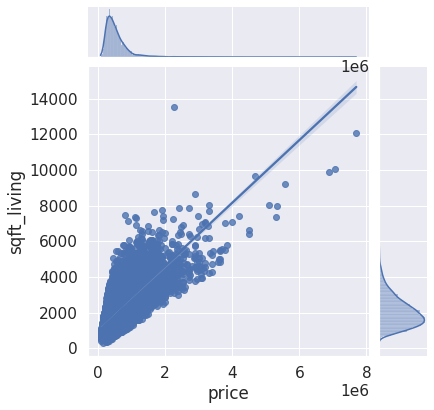

In [36]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

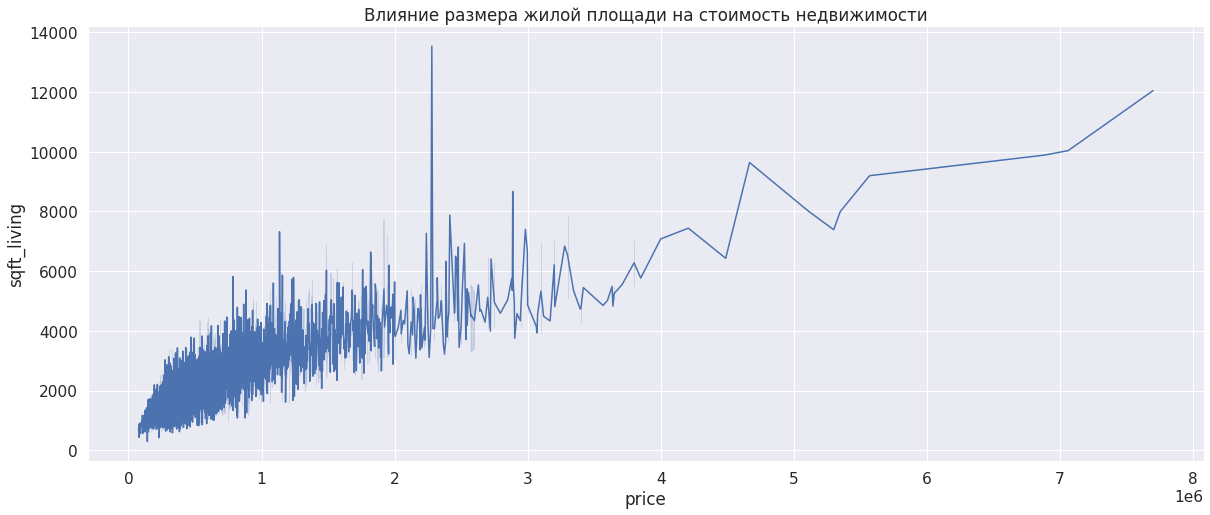

In [37]:
plt.figure(figsize=(20, 8))
plt.title('Влияние размера жилой площади на стоимость недвижимости')
sns.lineplot(x=df['price'], y=df['sqft_living']);

Размер жилой площади и стоимость недвижимости имеют линейную зависимость. С увеличением жилой площади растет стоимость недвижимости.

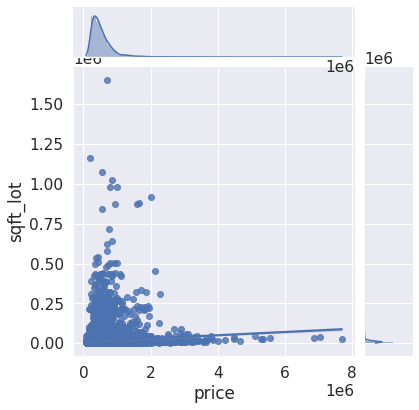

In [38]:
sns.jointplot(x=df['price'], y=df['sqft_lot'], kind='reg');

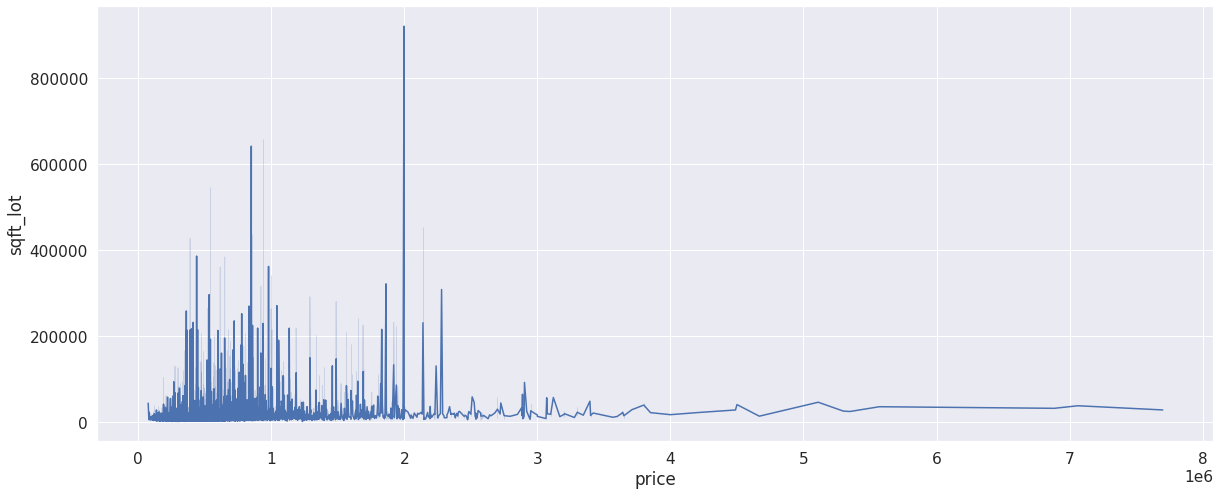

In [39]:
plt.figure(figsize=(20, 8))
sns.lineplot(x=df['price'], y=df['sqft_lot']);

Размер общей площади жилья не имеет явного влияния на стоимость недвижимости.